In [1]:
# !pip install scikit-optimize
# from google.colab import drive
# drive.mount('/content/drive')
# base_dir='/content/drive/MyDrive/ucd/'
base_dir='../../../folders/'

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
np.int = np.int_
import warnings
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [3]:
data_base=[f'ucddb{i:003d}' for i in range(2, 29)]
data_base.remove('ucddb004')
data_base.remove('ucddb016')
print(data_base)

['ucddb002', 'ucddb003', 'ucddb005', 'ucddb006', 'ucddb007', 'ucddb008', 'ucddb009', 'ucddb010', 'ucddb011', 'ucddb012', 'ucddb013', 'ucddb014', 'ucddb015', 'ucddb017', 'ucddb018', 'ucddb019', 'ucddb020', 'ucddb021', 'ucddb022', 'ucddb023', 'ucddb024', 'ucddb025', 'ucddb026', 'ucddb027', 'ucddb028']


In [4]:
# df = pd.DataFrame()
# for file in data_base:
#     i=pd.read_csv(base_dir+f'feature/{file}_win.csv')
#     df = pd.concat([df, i], ignore_index=True)
# df.dropna(how='all', axis=1,inplace=True)
# df.to_csv(base_dir+f'all/all.csv', index=False)

In [5]:
data_set = pd.read_csv(base_dir+f'all/all_win.csv')
data_set = data_set.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
data_set

,HRV_MeanNN_x,HRV_SDNN_x,HRV_RMSSD_x,HRV_SDSD_x,HRV_CVNN_x,HRV_CVSD_x,HRV_MedianNN_x,HRV_MadNN_x,HRV_MCVNN_x,HRV_IQRNN_x,...,peak_to_peak_y,rmse_y,kurtosis_y,skewness_y,waveform_factor_y,peak_factor_y,impulse_factor_y,margin_factor_y,rms_y,anns
0,941.406250,13.877191,10.461470,10.590011,0.014741,0.011113,937.50000,11.582812,0.012355,23.437500,...,3.426618,0.499383,3.728094,-0.717594,0.220546,6.861699,1.513324,2.803092,2.316825,0
1,932.963710,19.740977,10.578175,10.598053,0.021159,0.011338,937.50000,11.582812,0.012355,15.625000,...,3.426618,0.510929,3.205934,-0.847646,0.219974,6.706639,1.475284,2.785778,2.378262,0
2,784.417230,84.031488,92.695165,94.005934,0.107126,0.118171,773.43750,57.914062,0.074879,93.750000,...,3.426618,0.512045,3.090319,-1.034765,0.213657,6.692021,1.429797,2.764269,2.453831,0
3,915.826613,27.783640,20.768127,21.063296,0.030337,0.022677,914.06250,23.165625,0.025344,27.343750,...,3.409035,0.460080,3.062617,-0.937992,0.185486,7.409661,1.374385,2.723429,2.526806,0
4,851.562500,115.654429,69.943265,71.024059,0.135814,0.082135,878.90625,98.453906,0.112019,146.484375,...,3.409035,0.469791,4.127472,-1.289496,0.184498,7.256494,1.338809,2.705254,2.589996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,803.819444,42.248541,22.410536,22.369303,0.052560,0.027880,808.59375,28.957031,0.035812,33.203125,...,0.238339,0.114037,-1.477381,0.240137,0.037104,2.090020,0.077549,0.180015,3.074504,0
20400,740.985577,57.787447,17.377094,17.605423,0.077987,0.023451,734.37500,69.496875,0.094634,85.937500,...,0.238339,0.114434,-1.474395,0.259257,0.037259,2.082769,0.077601,0.180046,3.072412,0
20401,805.555556,13.043136,11.587810,11.754803,0.016191,0.014385,804.68750,11.582812,0.014394,15.625000,...,0.236386,0.113433,-1.441417,0.320433,0.036976,2.083932,0.077055,0.178622,3.068847,0
20402,808.159722,16.004808,10.889563,11.048543,0.019804,0.013475,812.50000,23.165625,0.028512,23.437500,...,0.236386,0.112289,-1.428370,0.317029,0.036602,2.105157,0.077054,0.178621,3.068897,2


In [6]:
# Assuming your target variable is named 'target'
x = data_set.drop('anns', axis=1)  # Features
y = data_set['anns']  # Target variable

# Create the estimator (in this case, LogisticRegression)
estimator = RandomForestClassifier()

# Create the RFE object
rfe = RFE(estimator, n_features_to_select=30, step=3, verbose=10)

# Fit the RFE object to the data
rfe.fit(x, y)

# Get the column names of the selected features
selected_features = x.columns[rfe.support_]

# Create a new DataFrame with the selected features
x = data_set[selected_features]

Fitting estimator with 187 features.
Fitting estimator with 184 features.
Fitting estimator with 181 features.
Fitting estimator with 178 features.
Fitting estimator with 175 features.
Fitting estimator with 172 features.
Fitting estimator with 169 features.
Fitting estimator with 166 features.
Fitting estimator with 163 features.
Fitting estimator with 160 features.
Fitting estimator with 157 features.
Fitting estimator with 154 features.
Fitting estimator with 151 features.
Fitting estimator with 148 features.
Fitting estimator with 145 features.
Fitting estimator with 142 features.
Fitting estimator with 139 features.
Fitting estimator with 136 features.
Fitting estimator with 133 features.
Fitting estimator with 130 features.
Fitting estimator with 127 features.
Fitting estimator with 124 features.
Fitting estimator with 121 features.
Fitting estimator with 118 features.
Fitting estimator with 115 features.
Fitting estimator with 112 features.
Fitting estimator with 109 features.
F

In [7]:
x

,HRV_MeanNN_x,HRV_Prc20NN_x,HRV_MeanNN_y,HRV_SDANN1_y,HRV_CVSD_y,HRV_MCVNN_y,HRV_SDRMSSD_y,HRV_pNN20_y,HRV_MinNN_y,HRV_MaxNN_y,...,mean_y,median_y,std_y,var_y,peak_to_peak_y,rmse_y,kurtosis_y,skewness_y,waveform_factor_y,peak_factor_y
0,941.406250,929.6875,887.054896,55.045392,0.111944,0.062822,1.180125,32.937685,304.6875,1656.2500,...,2.264299,2.138217,0.490537,0.240627,3.426618,0.499383,3.728094,-0.717594,0.220546,6.861699
1,932.963710,929.6875,890.181903,34.516891,0.112334,0.062822,1.181979,35.223881,304.6875,1656.2500,...,2.322683,2.182173,0.511149,0.261274,3.426618,0.510929,3.205934,-0.847646,0.219974,6.706639
2,784.417230,750.0000,893.314933,59.306612,0.112102,0.062294,1.197097,35.928144,304.6875,1656.2500,...,2.396577,2.293529,0.526978,0.277706,3.426618,0.512045,3.090319,-1.034765,0.213657,6.692021
3,915.826613,898.4375,911.847370,38.943009,0.105690,0.049420,1.165251,32.926829,304.6875,1656.2500,...,2.480407,2.476190,0.482002,0.232326,3.409035,0.460080,3.062617,-0.937992,0.185486,7.409661
4,851.562500,789.0625,913.560780,54.877815,0.105679,0.036759,1.168852,32.110092,304.6875,1656.2500,...,2.546320,2.625641,0.473641,0.224336,3.409035,0.469791,4.127472,-1.289496,0.184498,7.256494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,803.819444,789.0625,793.849469,14.224312,0.020415,0.029071,2.215166,12.466844,632.8125,882.8125,...,3.073420,3.055433,0.081616,0.006661,0.238339,0.114037,-1.477381,0.240137,0.037104,2.090020
20400,740.985577,692.1875,794.921875,16.700587,0.019212,0.028788,2.249370,12.500000,632.8125,882.8125,...,3.071327,3.051526,0.081651,0.006667,0.238339,0.114434,-1.474395,0.259257,0.037259,2.082769
20401,805.555556,796.8750,800.289042,6.541426,0.018375,0.028788,1.571215,10.723861,726.5625,882.8125,...,3.067751,3.045665,0.082016,0.006727,0.236386,0.113433,-1.441417,0.320433,0.036976,2.083932
20402,808.159722,796.8750,793.662964,18.535262,0.018353,0.029071,2.075336,10.344828,679.6875,882.8125,...,3.067813,3.049573,0.081559,0.006652,0.236386,0.112289,-1.428370,0.317029,0.036602,2.105157


Class=0, n=4405 (21.589%)
Class=2, n=10347 (50.711%)
Class=3, n=2661 (13.042%)
Class=1, n=2991 (14.659%)


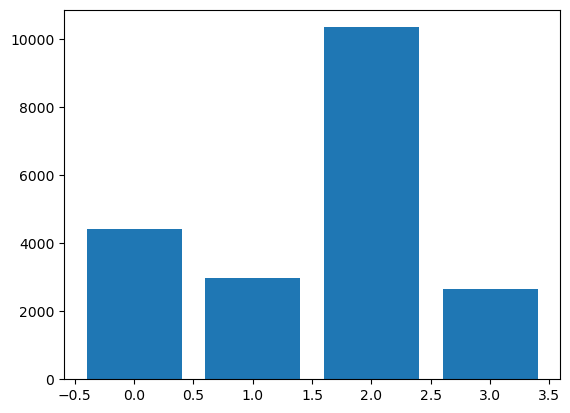

In [8]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,stratify=y,random_state=1)

In [10]:
# model = KNeighborsClassifier()
# model.fit(x_train, y_train)
# y_pred= model.predict(x_test)
# print(classification_report(y_test,y_pred,target_names=['WAKE','REM','LIGHT','DEEP']))

In [11]:
m = KNeighborsClassifier()
pipe = Pipeline(steps=[('std_slc', StandardScaler()), ('m', m)])
param_grid = {
    'm__n_neighbors': [1,3, 5, 7, 9, 11],  # Number of neighbors to use
    'm__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'm__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'm__leaf_size': [30, 40, 50],  # Leaf size passed to BallTree or KDTree
    'm__p': [1, 2],  # Power parameter for the Minkowski metric           
}  

In [12]:
clf = BayesSearchCV(pipe, param_grid,n_iter=50,cv=5,verbose=3,n_jobs=-1,refit=True,scoring='f1_macro')
clf.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END m__algorithm=kd_tree, m__leaf_size=30, m__n_neighbors=11, m__p=1, m__weights=distance;, score=0.847 total time=   0.8s
[CV 2/5] END m__algorithm=kd_tree, m__leaf_size=30, m__n_neighbors=11, m__p=1, m__weights=distance;, score=0.840 total time=   0.8s
[CV 3/5] END m__algorithm=kd_tree, m__leaf_size=30, m__n_neighbors=11, m__p=1, m__weights=distance;, score=0.842 total time=   1.1s
[CV 5/5] END m__algorithm=kd_tree, m__leaf_size=30, m__n_neighbors=11, m__p=1, m__weights=distance;, score=0.854 total time=   1.2s
[CV 4/5] END m__algorithm=kd_tree, m__leaf_size=30, m__n_neighbors=11, m__p=1, m__weights=distance;, score=0.838 total time=   1.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END m__algorithm=kd_tree, m__leaf_size=50, m__n_neighbors=9, m__p=1, m__weights=distance;, score=0.850 total time=   0.7s
[CV 5/5] END m__algorithm=kd_tree, m__leaf_size=50, m__n_neighbors=9, m__p=1, m__weights=di

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                        ('m', KNeighborsClassifier())]),
              n_jobs=-1, scoring='f1_macro',
              search_spaces={'m__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                             'm__leaf_size': [30, 40, 50],
                             'm__n_neighbors': [1, 3, 5, 7, 9, 11],
                             'm__p': [1, 2],
                             'm__weights': ['uniform', 'distance']},
              verbose=3)

In [13]:
print(clf.best_estimator_)

Pipeline(steps=[('std_slc', StandardScaler()),
                ('m', KNeighborsClassifier(leaf_size=50, n_neighbors=1, p=1))])


In [14]:
y_pred= clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['WAKE','REM','LIGHT','DEEP']))

              precision    recall  f1-score   support

        WAKE       0.84      0.74      0.79       881
         REM       0.92      0.96      0.94       598
       LIGHT       0.88      0.91      0.90      2070
        DEEP       0.90      0.92      0.91       532

    accuracy                           0.88      4081
   macro avg       0.89      0.88      0.88      4081
weighted avg       0.88      0.88      0.88      4081



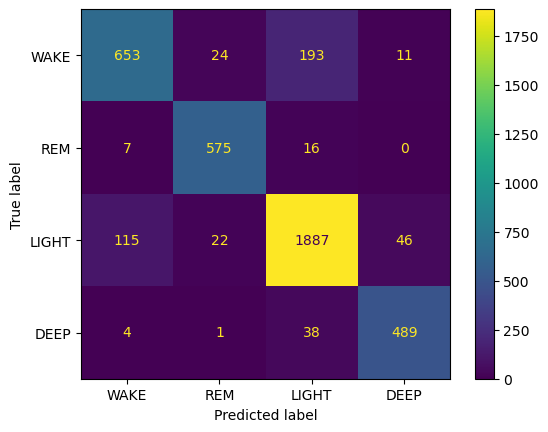

In [15]:


# %%
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['WAKE','REM','LIGHT','DEEP'])
disp.plot()
plt.show()

# %%

